# Airfare Price Prediction

Statement of Issue 
It can be hard to guess airline ticket rates, we might see a fare today, find out the price of the same flight tomorrow, it's going to be a different story. We may have heard travelers sometimes complain that the costs of airline fares are too volatile. As data scientists, we can show that something can be expected provided the correct data. 

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#Data Import
data = pd.read_excel("Data_Train.xlsx")

In [3]:
#To all the coloumns from the dataset
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [42]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [43]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [5]:
#Data cleaning
#Additional_Info and Route not required
#Since we want the changes permament , we write inplace = True or data  = data.drop alternatively 
data.drop(['Additional_Info', 'Route'], axis = 1,inplace = True)

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [8]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Price              False
dtype: bool

In [6]:
# Checking for nulls in Total_Stops
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [7]:
#check the null record in Total stops
data[data['Total_Stops'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [8]:
#Since there is just one null value,it's easier to drop rather to use forward or backfill
data.dropna(inplace = True)

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [10]:
# We extract  day values and month values from Date_of_Journey and create two new columns Journey_day &  Journey_month 
data["Journey_day"] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y").dt.day
data["Journey_month"] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [12]:
# Revoming date of journey
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [14]:
# same steps are applied to Dep_time column , we create two new column Dep_hour and Dep_min from extract hour and min from Dep_Time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50


In [16]:
# Similarly  we can extract values from Arrival_Time
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [ ]:
# now the remaninging categorical fields  are  airline, source destination duration total stops


In [20]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [21]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
# considering what encoding to perform out of one hote, label and ordinal. 
#ordinal can ignored as there is no specific order 
# if there is a big variance between the prices of airlines we cannot go for label encoding

In [ ]:
# Display price according to Airline 

<Axes: xlabel='Airline'>

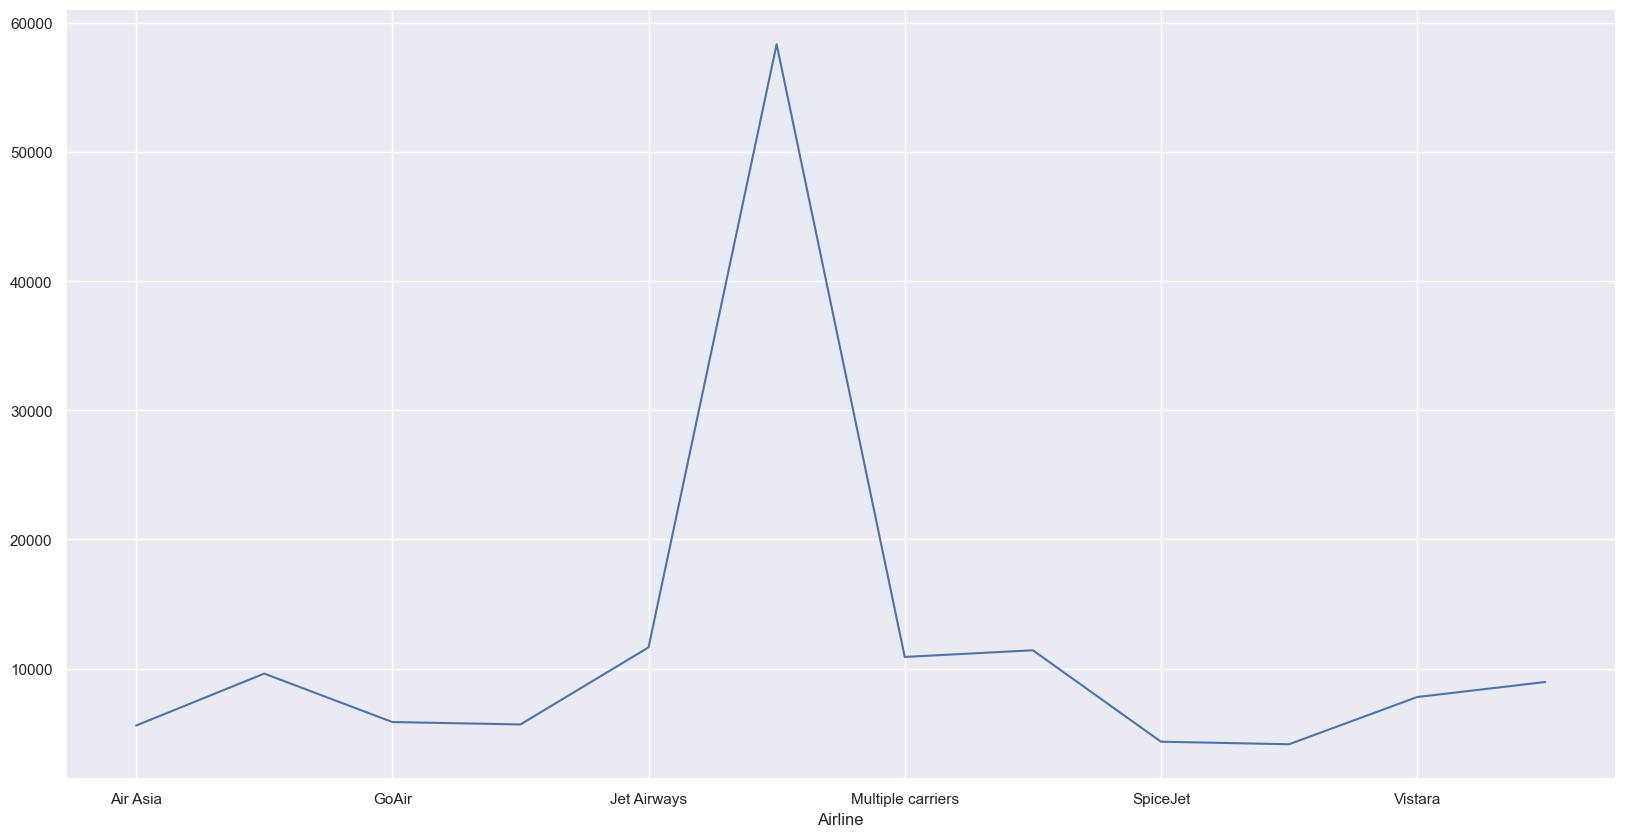

In [18]:
data.groupby('Airline')['Price'].mean().plot(figsize=(20,10))

In [ ]:
# here we can say that jet airways price higher than any onther airline and since there is a huge fluctuation in price we have to go for one hot encoding

In [ ]:
# chech the average price according to Airline 

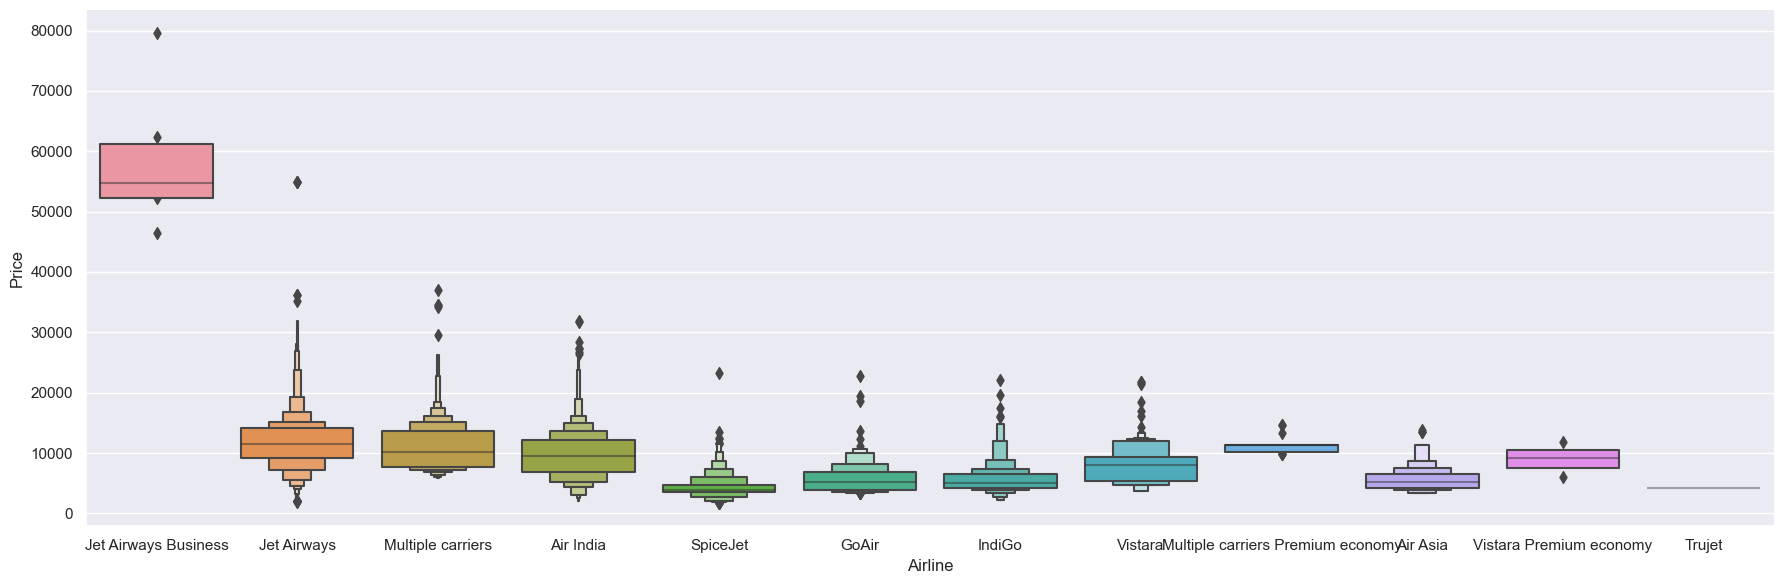

In [63]:

sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# Airline is Nominal Categorical data we will perform OneHotEncoding

In [19]:
airline = pd.get_dummies(data['Airline'])

In [20]:
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,True,False,False,False,False,False,False,False,False,False,False,False
10679,False,True,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,True,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# check the Source values counts 

In [68]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [ ]:
# display average price according to source 

<Axes: xlabel='Source'>

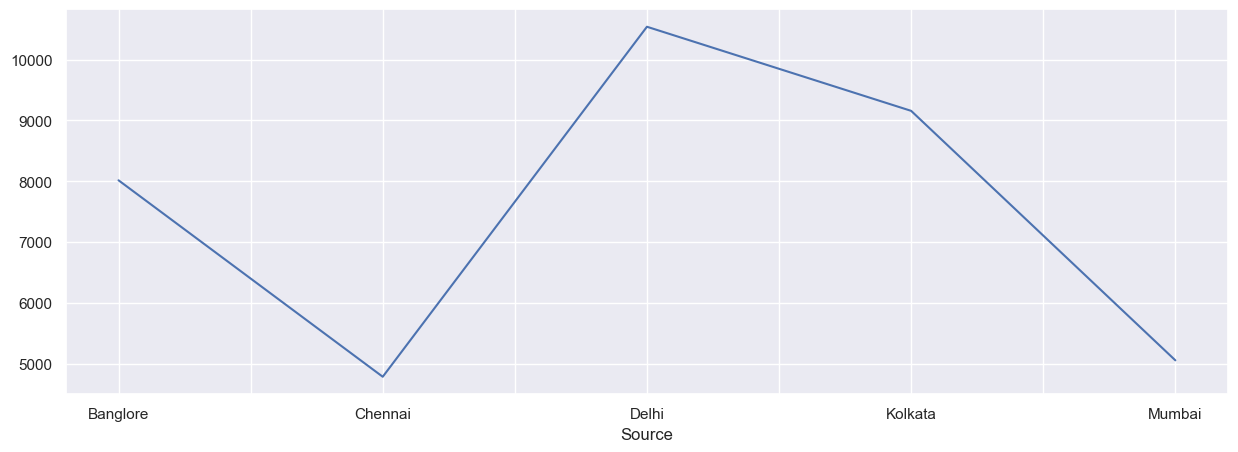

In [70]:
data.groupby('Source')['Price'].mean().plot(figsize=(15,5))

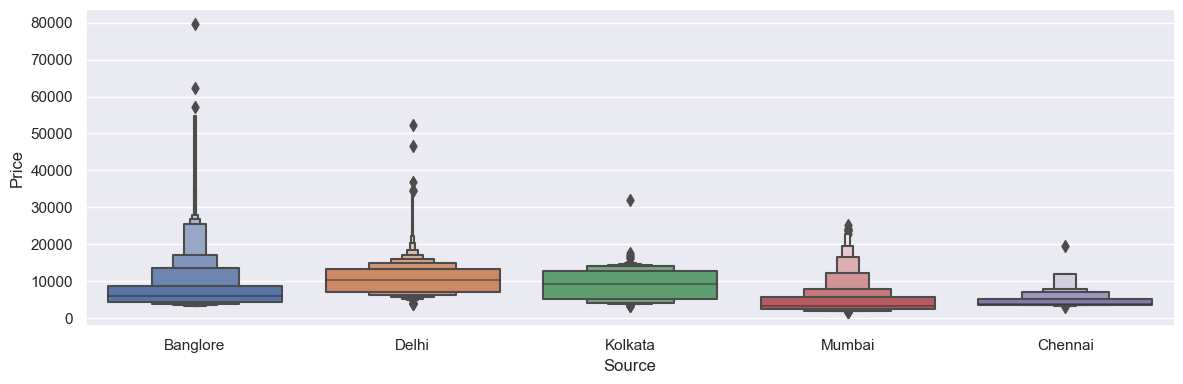

In [71]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
# Source is Nominal Categorical data we will perform OneHotEncoding

In [21]:
source = pd.get_dummies(data['Source'])
source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False
...,...,...,...,...,...
10678,False,False,False,True,False
10679,False,False,False,True,False
10680,True,False,False,False,False
10681,True,False,False,False,False


In [ ]:
# check Destination value counts

In [25]:
data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [ ]:
# Destination is Nominal Categorical data we will perform OneHotEncoding

In [22]:
destination = pd.get_dummies(data['Destination'])
destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
10678,True,False,False,False,False,False
10679,True,False,False,False,False,False
10680,False,False,True,False,False,False
10681,False,False,False,False,False,True


In [76]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [23]:
#Checking Total stops
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [ ]:
# Now replace categorical value in Total_stop with numeric value by manually

In [25]:
#data['Total_stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],[0,2,1,3,4])
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [28]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [26]:
data = pd.concat([data, airline, source, destination], axis = 1)

In [27]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [28]:
#drop original coloumns
data.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [29]:
data.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,19h,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,5h 25m,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,4h 45m,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [30]:
#Copying our data to df

df = data.copy()
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,19h,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,5h 25m,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,4h 45m,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [31]:
df['Duration_Hour'] = df['Duration'].str.split().str[0]
df['Duration_Minute'] = df['Duration'].str.split().str[1]

In [32]:
df[['Duration_Hour','Duration_Minute']]= df[['Duration_Hour','Duration_Minute']].fillna(0)

In [33]:
df[['Duration_Hour','Duration_Minute']]

,Duration_Hour,Duration_Minute
0,2h,50m
1,7h,25m
2,19h,0
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,0
10681,2h,40m


In [34]:
df.isnull().any()

Duration                             False
Total_Stops                          False
Price                                False
Journey_day                          False
Journey_month                        False
Dep_hour                             False
Dep_min                              False
Arrival_hour                         False
Arrival_min                          False
Air Asia                             False
Air India                            False
GoAir                                False
IndiGo                               False
Jet Airways                          False
Jet Airways Business                 False
Multiple carriers                    False
Multiple carriers Premium economy    False
SpiceJet                             False
Trujet                               False
Vistara                              False
Vistara Premium economy              False
Banglore                             False
Chennai                              False
Delhi      

In [47]:
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,2h 50m,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2h,50m
1,7h 25m,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7h,25m
2,19h,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19h,0
3,5h 25m,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5h,25m
4,4h 45m,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4h,45m


In [35]:
df[['Duration_Hour','Duration_Minute']]=df[['Duration_Hour','Duration_Minute']].replace('[h-m]','',regex = True)

In [36]:
df[['Duration_Hour','Duration_Minute']]

,Duration_Hour,Duration_Minute
0,2,50
1,7,25
2,19,0
3,5,25
4,4,45
...,...,...
10678,2,30
10679,2,35
10680,3,0
10681,2,40


In [50]:
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,2h 50m,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2,50
1,7h 25m,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7,25
2,19h,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19,0
3,5h 25m,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5,25
4,4h 45m,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4,45


In [37]:
df.drop('Duration', axis = 1, inplace = True)

In [38]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,0,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2,50
1,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7,25
2,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19,0
3,1,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5,25
4,1,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4,45


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   Journey_day                        10682 non-null  int32 
 3   Journey_month                      10682 non-null  int32 
 4   Dep_hour                           10682 non-null  int32 
 5   Dep_min                            10682 non-null  int32 
 6   Arrival_hour                       10682 non-null  int32 
 7   Arrival_min                        10682 non-null  int32 
 8   Air Asia                           10682 non-null  bool  
 9   Air India                          10682 non-null  bool  
 10  GoAir                              10682 non-null  bool  
 11  IndiGo                             10682 non-null  bool  
 12  Jet Airwa

In [39]:
# Duration hour and duration minute is in Object data type and needs to be converted to integer
df[['Duration_Hour','Duration_Minute']]=df[['Duration_Hour','Duration_Minute']].astype('int')
df[['Duration_Hour','Duration_Minute']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Duration_Hour    10682 non-null  int32
 1   Duration_Minute  10682 non-null  int32
dtypes: int32(2)
memory usage: 166.9 KB


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int32
 3   Journey_month                      10682 non-null  int32
 4   Dep_hour                           10682 non-null  int32
 5   Dep_min                            10682 non-null  int32
 6   Arrival_hour                       10682 non-null  int32
 7   Arrival_min                        10682 non-null  int32
 8   Air Asia                           10682 non-null  bool 
 9   Air India                          10682 non-null  bool 
 10  GoAir                              10682 non-null  bool 
 11  IndiGo                             10682 non-null  bool 
 12  Jet Airways            

In [40]:
df.shape

(10682, 33)

In [64]:
# rearranging the sequence: Price at the last
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Duration_Hour',
       'Duration_Minute'],
      dtype='object')

In [41]:
df = df[['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min','Duration_Hour',
       'Duration_Minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Price']]

In [42]:
df.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Price
0,0,24,3,22,20,1,10,2,50,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,3897
1,2,1,5,5,50,13,15,7,25,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,7662
2,2,9,6,9,25,4,25,19,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,13882
3,1,12,5,18,5,23,30,5,25,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,6218
4,1,1,3,16,50,21,35,4,45,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,13302


In [ ]:
# this is a problem of multilinear regression

In [43]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [69]:
x

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
4,1,1,3,16,50,21,35,4,45,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
10679,0,27,4,20,45,23,20,2,35,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
10680,0,27,4,8,20,11,20,3,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
10681,0,1,3,11,30,14,10,2,40,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [44]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [45]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)

In [46]:
#importing linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
model.score(x_train, y_train)

0.6216960700942382

In [48]:
model.score(x_test, y_test)

0.6263919372557312

In [ ]:
#The accuracy of the model is not good. If linear fails we can apply regularization(Ridge and Lasso)
#Ridge = when features(x) are less
#lasso = when features (x) are more

In [49]:
from sklearn.linear_model import Lasso

In [50]:
model1 = Lasso(alpha = 10)
model1.fit(x_train, y_train)

Lasso(alpha=10)

In [51]:
print('Training Accuracy', model1.score(x_train,y_train))
print('Testing Accuracy', model1.score(x_test,y_test))

Training Accuracy 0.6132719860553446
Testing Accuracy 0.6213204811046575


In [ ]:
#Since the accuracy with Lasso is also not good, we can go with the concept of Feature selection and later with Bagging

<Axes: >

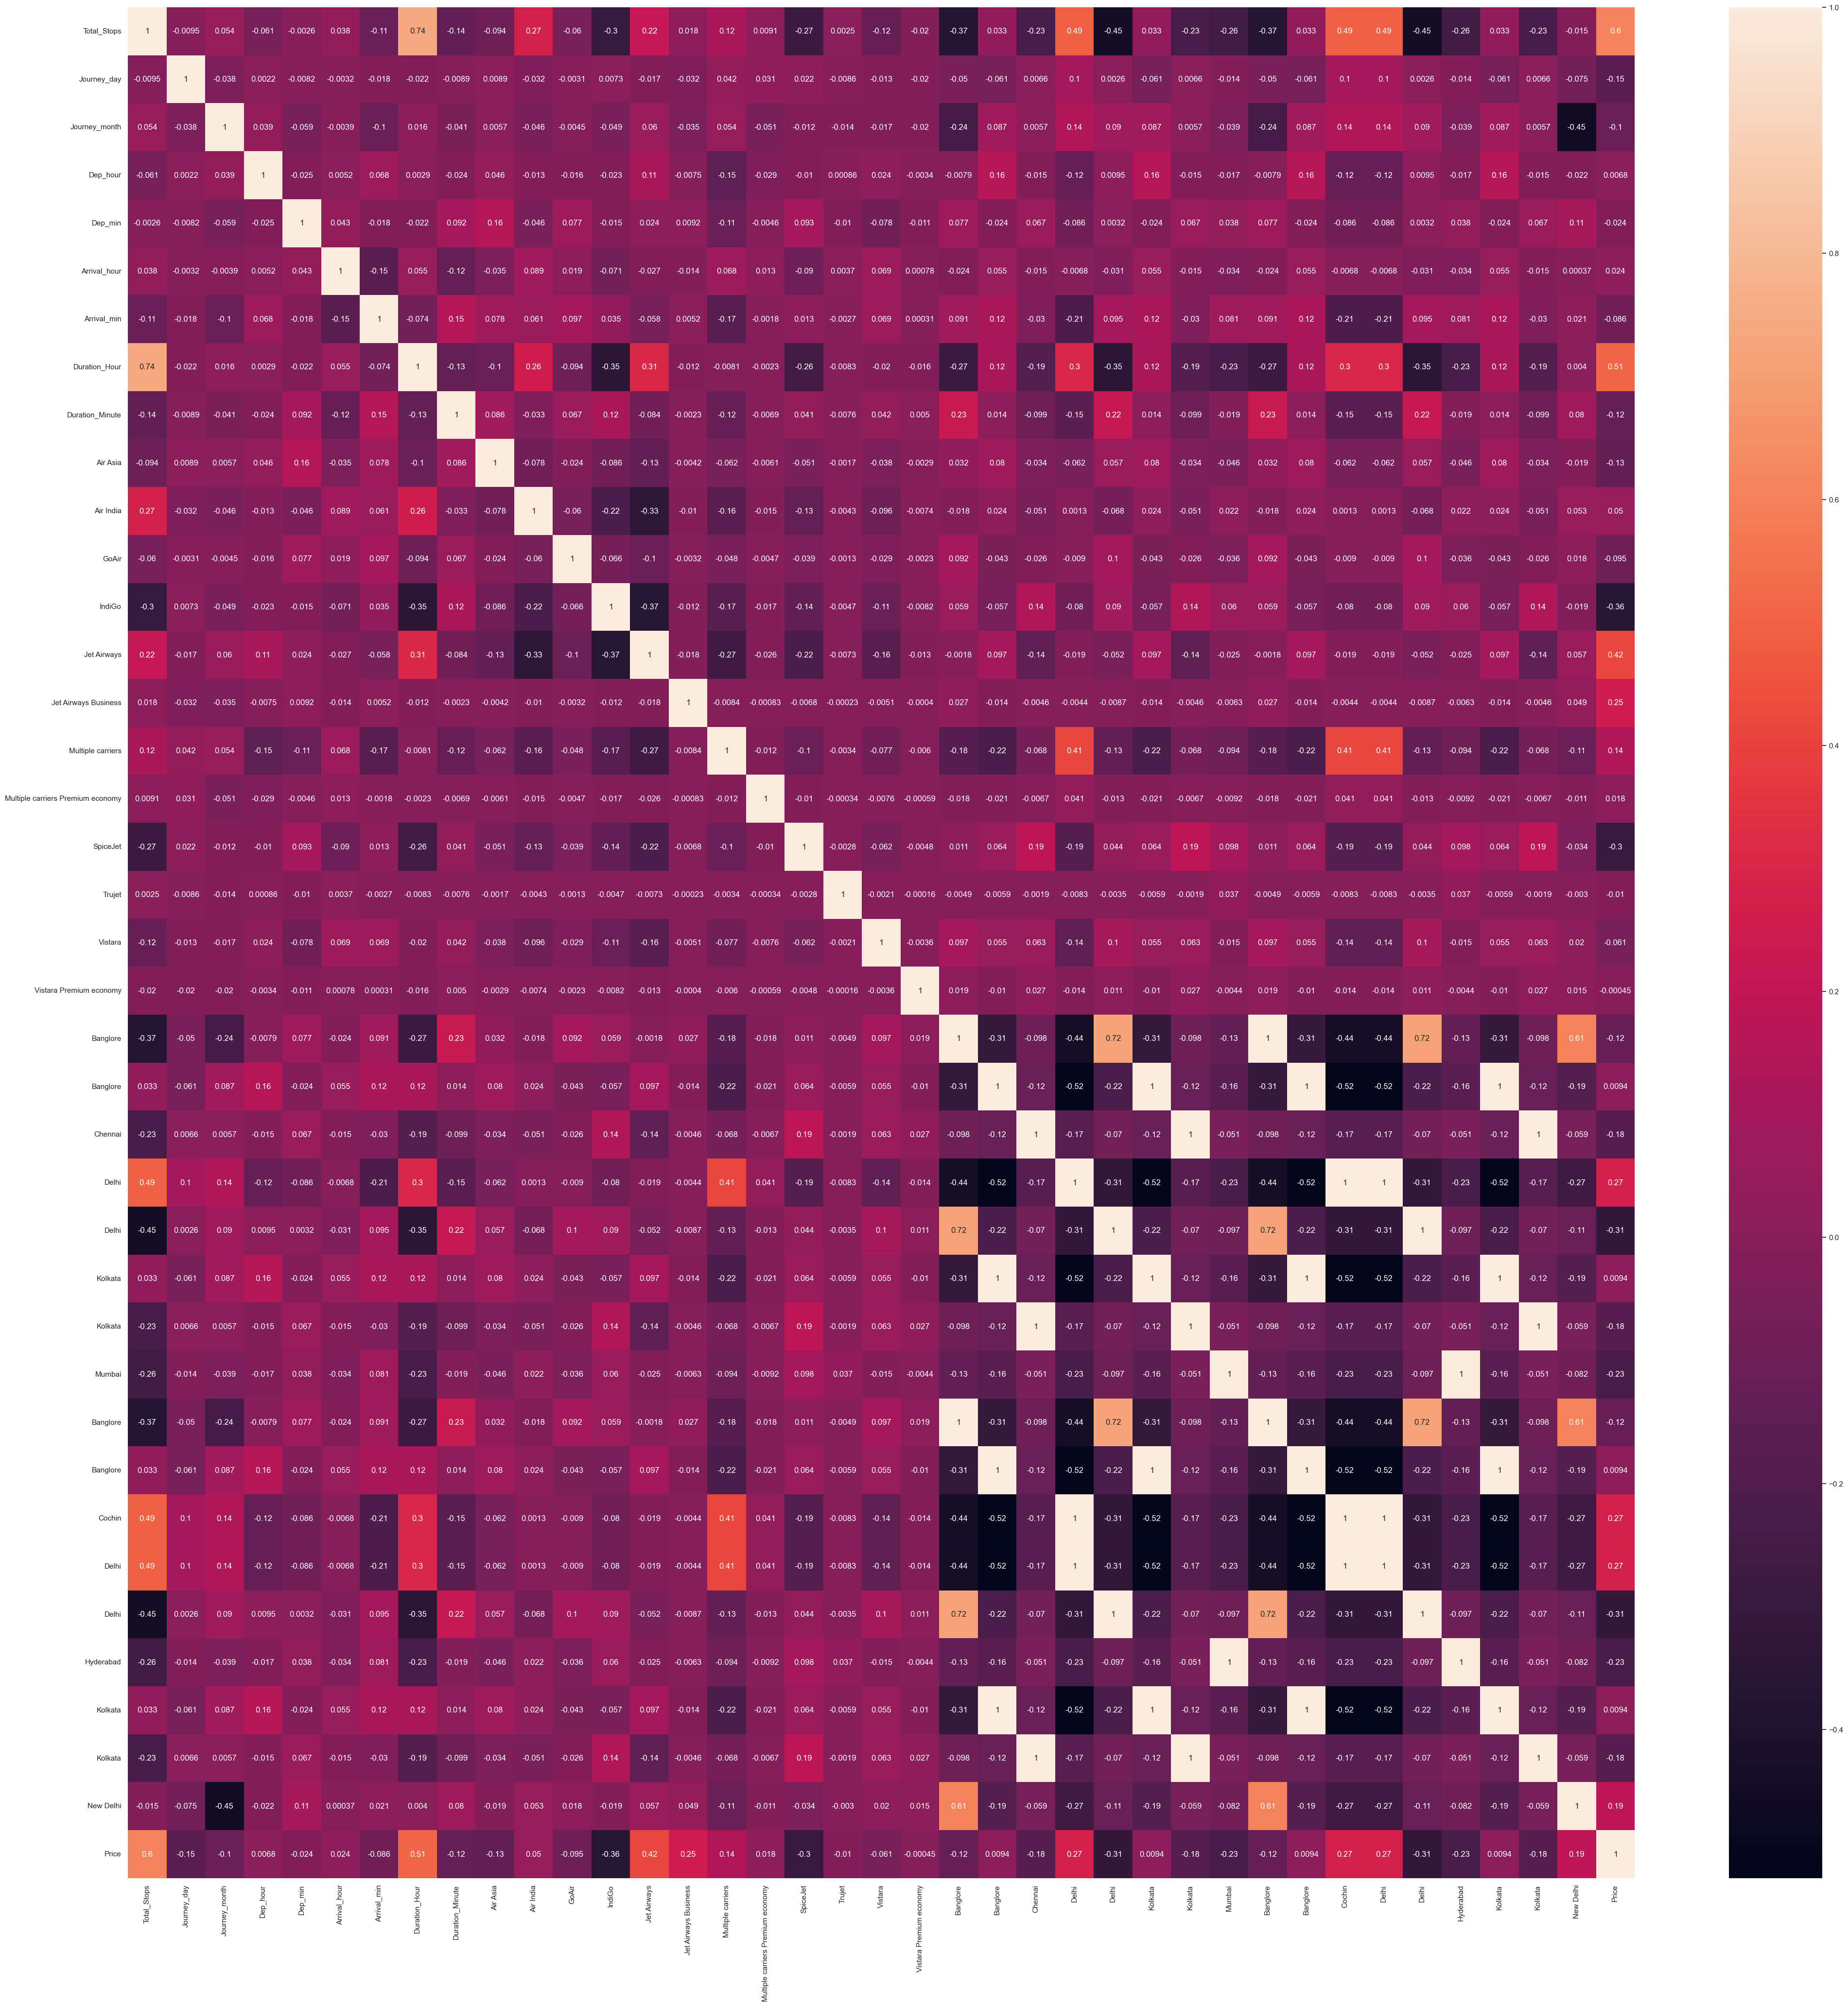

In [83]:
#For feature selection we find with the features which affect the price most 
# Find a co-relation
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(),annot = True)

In [52]:
#for Feature selection we have an algorithm called Extra Tree regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [53]:
#Check which coloumn has the higest importance on basis of absolute mean error
model.feature_importances_

array([2.28454185e-01, 1.43154793e-01, 5.37525263e-02, 2.41595577e-02,
       2.07230480e-02, 2.80916577e-02, 1.96629243e-02, 1.27222654e-01,
       1.74481890e-02, 2.18886141e-03, 8.68571069e-03, 1.88944413e-03,
       1.97357796e-02, 1.32617869e-01, 6.75957059e-02, 1.64259347e-02,
       7.53183241e-04, 3.47310679e-03, 1.31328411e-04, 4.48290061e-03,
       7.73797527e-05, 6.57021387e-03, 9.09081248e-04, 3.49521281e-04,
       7.04926443e-03, 6.38521250e-03, 9.56788629e-04, 3.60681044e-04,
       6.32548387e-03, 4.91518114e-03, 1.06300551e-03, 7.23851332e-03,
       8.76349707e-03, 6.37605899e-03, 6.95664655e-03, 8.60482883e-04,
       3.38797388e-04, 1.38548315e-02])

In [54]:
#convert into Series(column)
a = pd.Series(model.feature_importances_, index = x.columns)

In [55]:
a.nlargest(10)

Total_Stops             0.228454
Journey_day             0.143155
Jet Airways             0.132618
Duration_Hour           0.127223
Jet Airways Business    0.067596
Journey_month           0.053753
Arrival_hour            0.028092
Dep_hour                0.024160
Dep_min                 0.020723
IndiGo                  0.019736
dtype: float64

<Axes: >

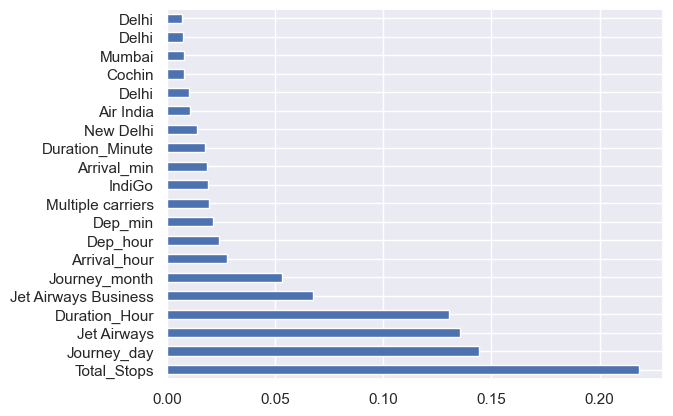

In [93]:
a.nlargest(20).plot(kind = 'barh')

In [ ]:
#We can use feature selection when the coloumns are more but in this case we will not it

In [56]:

## How try all diffrent regression algorith and find the testing score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [57]:
model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor]

for i in model:
    reg = i()
    reg = reg.fit(x_train,y_train)
    print(i , 'accuracy',reg.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.7045810885970838
<class 'sklearn.svm._classes.SVR'> accuracy 0.004675687532239681
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.8020009742549196
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.5745822827320851
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.4837686524471102


In [ ]:
#  applying Kflod and cross validation technique

In [58]:
from sklearn.model_selection import KFold,cross_val_score

In [59]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))
print(model)

[<class 'sklearn.tree._classes.DecisionTreeRegressor'>, <class 'sklearn.svm._classes.SVR'>, <class 'sklearn.ensemble._forest.RandomForestRegressor'>, <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>]


In [102]:

results = []
names = []
for name,model in models:
    a= KFold(5)
    cv_result =cross_val_score(model,x_train,y_train,cv=a)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.535879323535361
DecisionTree 0.6872565910508686
RF 0.8059781434698229
SVM -0.0056493059101819345
AdaBoost 0.36959628493822


# we see RandomForestRegressor gives us best score so we can use RandomForest Regressor algorithm

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(x_test)
y_pred

array([16668.85,  5559.47,  8901.28, ...,  5883.19,  3402.95,  7073.47])

In [71]:
reg_rf.score(x_train, y_train)

0.955681517093295

In [72]:
reg_rf.score(x_test, y_test)

0.8024440595492739

# Hyper Parameter Tuning

In [75]:
#Both these methods are used for hyperpameter tuning: It's used to optmize the parameters to provide more accuracy
#RandomizedSearchCV: Randamly selects the pameters for tuning
#GridSearchCV: Selects the parameters in sequence
#results are mostly same
from sklearn.model_selection import RandomizedSearchCV


# create list for all possible parameter

In [73]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [74]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation and  search across 100 different combinations

In [77]:
#reg_rf
rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               verbose=2)

In [78]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_e

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [86]:
#We now got best parameters to use in RandomForest generator
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 15)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1000)

In [87]:
y_pred = reg_rf.predict(x_test)
y_pred

array([16064.54587179,  6521.90060052,  8731.68219444, ...,
        5802.22400483,  3126.23498943,  6948.45288232])

In [88]:
reg_rf.score(x_train, y_train)

0.8460040625220095

In [89]:
reg_rf.score(x_test, y_test)

0.810898551699263

# compare y_test and y_pred value using distplot

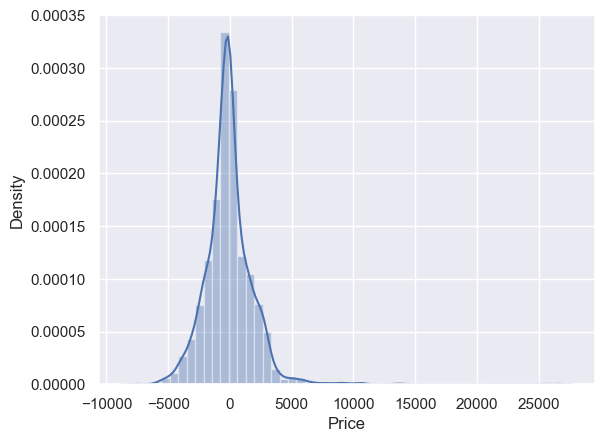

In [90]:
sns.distplot(y_test-y_pred)
plt.show()

# And scatter plot

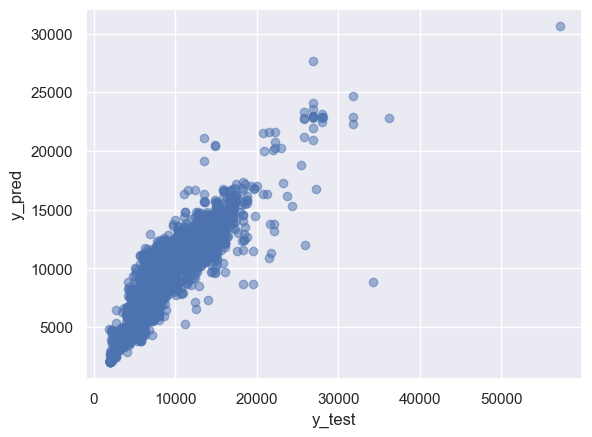

In [91]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Model Evalution 

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# check mean_absolute_error

In [93]:
mean_absolute_error(y_test, y_pred)

1323.4992403938656

# check mean_squared_error

In [94]:
mean_squared_error(y_test, y_pred)

3857844.7628269

# check r2_score

In [95]:
r2_score(y_test, y_pred)

0.810898551699263